In [ ]:
# 环境配置

# 安装框架-Linux
# ! conda install pytorch==1.10.0 torchvision==0.11.0 torchaudio==0.10.0 cudatoolkit=11.3 -c pytorch -c conda-forge
# ! pip install https://storage.googleapis.com/tensorflow/linux/gpu/tensorflow_gpu-2.6.0-cp38-cp38-manylinux2010_x86_64.whl

# 安装框架-Windows
# ! conda install pytorch==1.10.0 torchvision==0.11.0 torchaudio==0.10.0 cudatoolkit=11.3 -c pytorch -c conda-forge
! conda install -c conda-forge tensorflow-gpu

In [ ]:
# 检测Pytorch框架，显示True则为通过

import torch

print(torch.__version__)
print(torch.cuda.is_available())

In [ ]:
# 检测Tensorflow环境，显示True则为通过

import tensorflow as tf

tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

In [ ]:
# 安装其它包
%pip install -r requirements.txt -i https://pypi.tuna.tsinghua.edu.cn/simple

d:\ProgramData\miniconda3\envs\LSGL_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


D:/LSGL_test/user\M0X@@0TRW_P7L}K7PMH}[7Y.png


d:\ProgramData\miniconda3\envs\LSGL_env\lib\site-packages\transformers\models\maskformer\feature_extraction_maskformer.py:28: FutureWarning: The class MaskFormerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use MaskFormerImageProcessor instead.
  warnings.warn(
d:\ProgramData\miniconda3\envs\LSGL_env\lib\site-packages\transformers\models\maskformer\image_processing_maskformer.py:403: FutureWarning: The `size_divisibility` argument is deprecated and will be removed in v4.27. Please use `size_divisor` instead.
  warnings.warn(
d:\ProgramData\miniconda3\envs\LSGL_env\lib\site-packages\transformers\models\maskformer\image_processing_maskformer.py:410: FutureWarning: The `max_size` argument is deprecated and will be removed in v4.27. Please use size['longest_edge'] instead.
  warnings.warn(
d:\LSGL\LSGL\hgmod.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().r

分割完成
遮罩处理完成
文件夹已存在


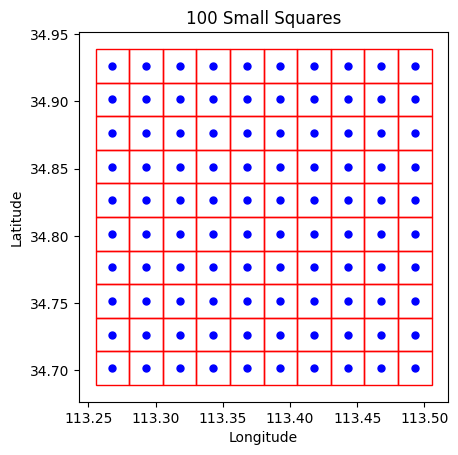

无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
28
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
37
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
46
无街景
48
无街景
无街景
无街景
52
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
1


d:\LSGL\./LSGL/LoFTR\src\loftr\utils\coarse_matching.py:246: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  [i_ids % data['hw0_c'][1], i_ids // data['hw0_c'][1]],
d:\LSGL\./LSGL/LoFTR\src\loftr\utils\coarse_matching.py:249: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  [j_ids % data['hw1_c'][1], j_ids // data['hw1_c'][1]],
d:\ProgramDa

目标匹配完成
目标匹配完成
目标匹配完成
目标匹配完成
目标匹配完成
12625755.062840847
1.4125867540936026
文件夹已存在


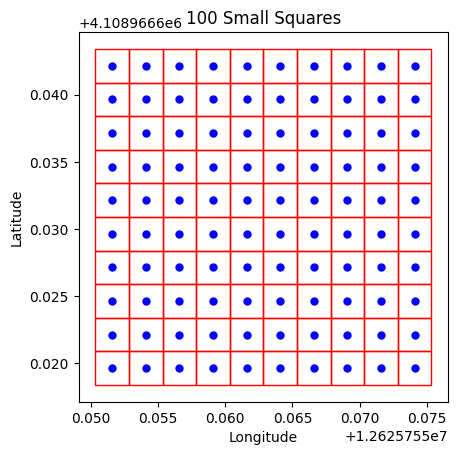

无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景


KeyboardInterrupt: 

In [1]:
# 添加sys路径
import sys
sys.path.append('./LSGL/LoFTR')

# 使用Huggingface模型
import LSGL.LoFTR as LoFTR
import LSGL.hgmod as hgmod
import LSGL.maskprocess as mp
import LSGL.conver as conver
import StreetView.Block as Block
import StreetView.spider as spider
import glob
import os

# 执行科学加速
# ! export http_proxy=http://172.181.217.43:12798 && export https_proxy=http://172.181.217.43:12798

# 设定参数

# 获取影像的中心
center = (113.380353386,34.8141059127)
# 网格边长
length = 0.25
# 坐标结果输出
csv_file = 'D:/LSGL_test/test1/coor/coordinates.csv'
# 数据输出
data_outpath = 'D:/LSGL_test/resource'
# 用户影像输入路径
# img_inppath = 'db_upload/'
img_inppath = r'D:/LSGL_test/user'
# 用户影像输出路径
# img_outpath = 'database_img/'
mask_outpath = 'D:/LSGL_test/tmp'
# 匹配结果输出路径
res_path = 'D:/LSGL_test/res'
res_tmp = 'D:/LSGL_test/res_tmp'
# 环境
envir = 'windows' # or 'linux'
# 用于记录匹配结果状态
errorarr = []  

# 针对不同环境处理路径
paths = [img_inppath, mask_outpath, res_path, data_outpath]
img_inppath, mask_outpath, res_path, data_outpath = conver.path(paths, envir)
# 清理文件夹
clean_paths = [mask_outpath, res_path, data_outpath]
conver.clean(clean_paths)

# 设定处理模型
segmodel = 'maskformer-swin-large-ade'
# segmodel = 'maskformer-swin-tiny-ade'
# segmodel = 'maskformer-swin-large-coco'

# 调用分割模型
inp_imgs = glob.glob(os.path.join(img_inppath + '*.png'))
for userimage in inp_imgs:
    print(userimage)
    userimage = hgmod.Unipath(userimage)
    hgmod.imagesegment(userimage,mask_outpath,segmodel)
    hgmod.release_memory

# 检查场景类型
# mp.imgscene(mask_outpath)
# 处理遮罩
mp.proceed(mask_outpath, img_inppath, segmodel)

# 爬取街景并进行匹配
for level in range(5):
    threshold = 1
    data_outpath_tmp = data_outpath + str(level) + '/'
    res_tmp = res_path + str(level) + '/'
    errorarr.append(0)  # 记录状态码

    # 提取小格
    if level >= 1:
        length = length / 10

    Block.Cut(center, length, csv_file)
    spider.getPic(data_outpath_tmp, csv_file)

    print(Block.chekres(data_outpath_tmp))
    # 检查是否有跑出结果
    if Block.chekres(data_outpath_tmp) == 0:
        print('已到达最小层级')
        break

    # 调用LoFTR匹配计算
    LoFTR.process(img_inppath, data_outpath_tmp, res_tmp, mask_outpath)
    LoFTR.rating(res_tmp)
    LoFTR.write_res(res_tmp, level)
    x, y, res_score = LoFTR.bestpid(level, res_tmp, data_outpath_tmp, errorarr[level])
    print(x)
    if x == 0:  # 如果没有匹配结果
        break
    print(res_score)
    center = (x, y)

    if res_score < threshold:
        try:
            level = level - 2
            errorarr[level] += 1
        except:
            print('无可置信结果')
            break
# 已完成主体，进行测试

In [2]:
import StreetView.Block as Block
import StreetView.spider as spider

# center = (113.380353386,34.8141059127)
# length = 0.25
# csv_file = 'D:/LSGL_test/test1/coordinates.csv'
path = 'D:/LSGL_test/resource/downloadPic'
# Block.Cut(center, length, csv_file)
# spider.getPic('D:/LSGL_test/resource', csv_file)
print(Block.chekres(path))

0
